In [205]:
import pandas as pd
from matplotlib import pyplot as plt

gdp_data = pd.read_csv('GDP_Per_Capita.csv', skiprows = 4, index_col=1)
gdp_metadata = pd.read_csv('Metadata_Country_API_GDP_Per_Capita.csv', index_col=0)
gdp_metadata.drop(gdp_metadata.filter(regex="Unnamed"),axis=1, inplace=True)
gdp_data.drop(gdp_data.filter(regex="Unnamed"),axis=1, inplace=True)

In [206]:
ufc_data = pd.read_csv('Underweight_Children_Data.csv', skiprows = 4, index_col=1)
ufc_metadata = pd.read_csv('Metadata_Country_API_Underweight_Children_Data.csv', index_col=0)
ufc_data.drop(ufc_data.filter(regex="Unnamed"),axis=1, inplace=True)
ufc_metadata.drop(ufc_metadata.filter(regex="Unnamed"),axis=1, inplace=True)

In [207]:
gdp_df = pd.merge(gdp_metadata,gdp_data,on='Country Code')
ufc_df = pd.merge(ufc_metadata,ufc_data,on='Country Code')

In [272]:
gdp_df_trim = gdp_df.drop(["Region","IncomeGroup","TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)
ufc_df_trim = ufc_df.drop(["Region","IncomeGroup","TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)

In [273]:
gdp_melt = gdp_df_trim.melt(ignore_index=False,var_name="Year",value_name="GDP")
ucf_melt = ufc_df_trim.melt(ignore_index=False,var_name="Year",value_name="MalnutritionData")

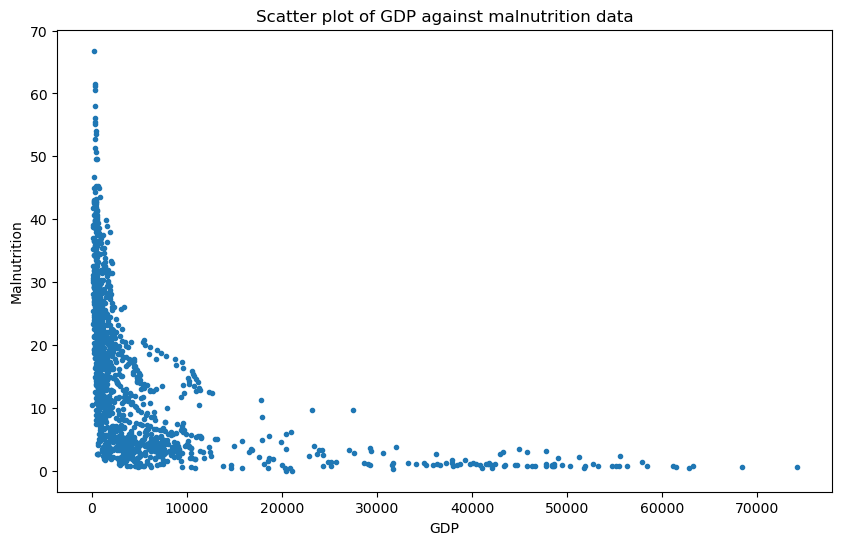

In [277]:
plt.figure(figsize=(10,6))
plt.title("Scatter plot of GDP against malnutrition data")
plt.xlabel("GDP")
plt.ylabel("Malnutrition")
plt.scatter(gdp_melt['GDP'],ucf_melt['MalnutritionData'], marker='.')
plt.show()